# importing Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plasma_palette=sns.color_palette("plasma")
cool_palette=sns.color_palette("cool")
viridis_palette=sns.color_palette("viridis")
inferno_palette=sns.color_palette("inferno")
icefire_palette=sns.color_palette("icefire")
icefire_r_palette=sns.color_palette("icefire_r")
mako_palette=sns.color_palette("mako")


import warnings
warnings.filterwarnings('ignore')  

from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split




# Inspect the dataset

In [161]:
df = pd.read_csv('predicting_mobile_game_success_train_set.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Unnamed: 18
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568,Games,"Games, Strategy, Puzzle",11/7/2008,30/05/2017,NaN
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960,Games,"Games, Strategy, Board",11/7/2008,17/05/2018,NaN
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816,Games,"Games, Board, Strategy",11/7/2008,5/9/2017,NaN
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,NaN
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           13599 non-null  object 
 1   ID                            13599 non-null  int64  
 2   Name                          13599 non-null  object 
 3   Subtitle                      2828 non-null   object 
 4   Icon URL                      13599 non-null  object 
 5   Average User Rating           6518 non-null   float64
 6   User Rating Count             6518 non-null   float64
 7   Price                         13598 non-null  float64
 8   In-app Purchases              6351 non-null   object 
 9   Description                   13599 non-null  object 
 10  Developer                     13599 non-null  object 
 11  Age Rating                    13599 non-null  object 
 12  Languages                     13558 non-null  object 
 13  S

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13599.0,9.681753e+08,2.654175e+08,284921427.0,831189423.5,1.035007e+09,1.173261e+09,1.341865e+09
Average User Rating,6518.0,4.031221e+00,7.510819e-01,1.0,3.5,4.000000e+00,4.500000e+00,5.000000e+00
User Rating Count,6518.0,3.581406e+03,4.543505e+04,5.0,13.0,4.800000e+01,3.307500e+02,3.032734e+06
Price,13598.0,9.248537e-01,8.697904e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,13599.0,1.040560e+08,1.974214e+08,51328.0,21204992.0,4.839117e+07,1.128550e+08,4.005591e+09
Unnamed: 18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df.describe(include='object').T

,count,unique,top,freq
URL,13599,13469,https://apps.apple.com/us/app/swipey-shapes/id...,2
Name,13599,13469,Swipey Shapes,2
Subtitle,2828,2677,become billionaire!,5
Icon URL,13599,13469,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,2
In-app Purchases,6351,3110,0.99,812
Description,13599,13115,#NAME?,13
Developer,13599,6664,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,122
Age Rating,13599,4,4+,9585
Languages,13558,844,EN,9738
Primary Genre,13599,20,Games,13058


In [165]:
df.drop(["ID",'URL', 'Icon URL','Unnamed: 18'], axis=1, inplace=True)

In [166]:
df.shape

(13599, 15)

# Cleaning the dataset

## Missing Values

In [167]:
import missingno as msno

In [168]:
def get_missing_precentage(df:pd.DataFrame) -> pd.DataFrame:
    missing_df = df.isna().sum().reset_index().rename(columns={0:'Missing Values'})
    missing_df['Precentage'] = (missing_df['Missing Values'] / len(df)) * 100
    missing_df = missing_df.sort_values(by='Missing Values', ascending=False).round(2)
    return missing_df

In [169]:
missing_df = get_missing_precentage(df)
missing_df

,index,Missing Values,Precentage
1,Subtitle,10771,79.20
5,In-app Purchases,7248,53.30
2,Average User Rating,7081,52.07
3,User Rating Count,7081,52.07
9,Languages,41,0.30
4,Price,1,0.01
0,Name,0,0.00
6,Description,0,0.00
7,Developer,0,0.00
8,Age Rating,0,0.00


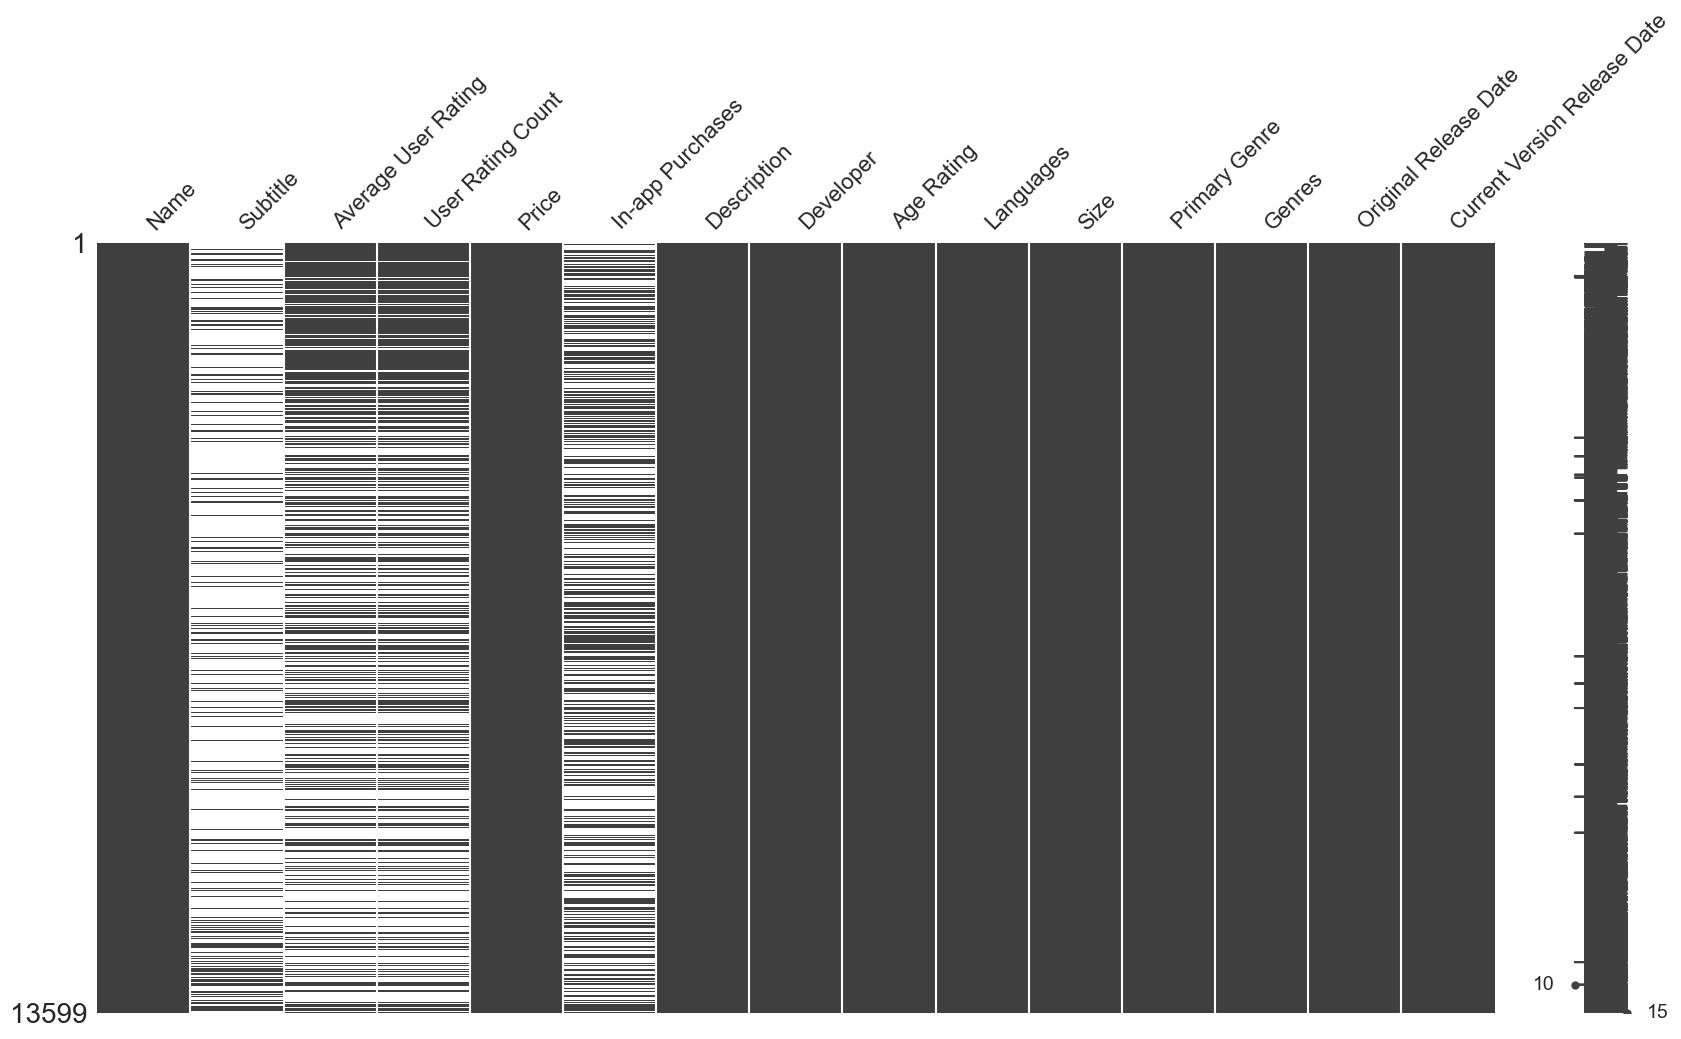

In [170]:
msno.matrix(df, figsize=(20, 10))
plt.show()

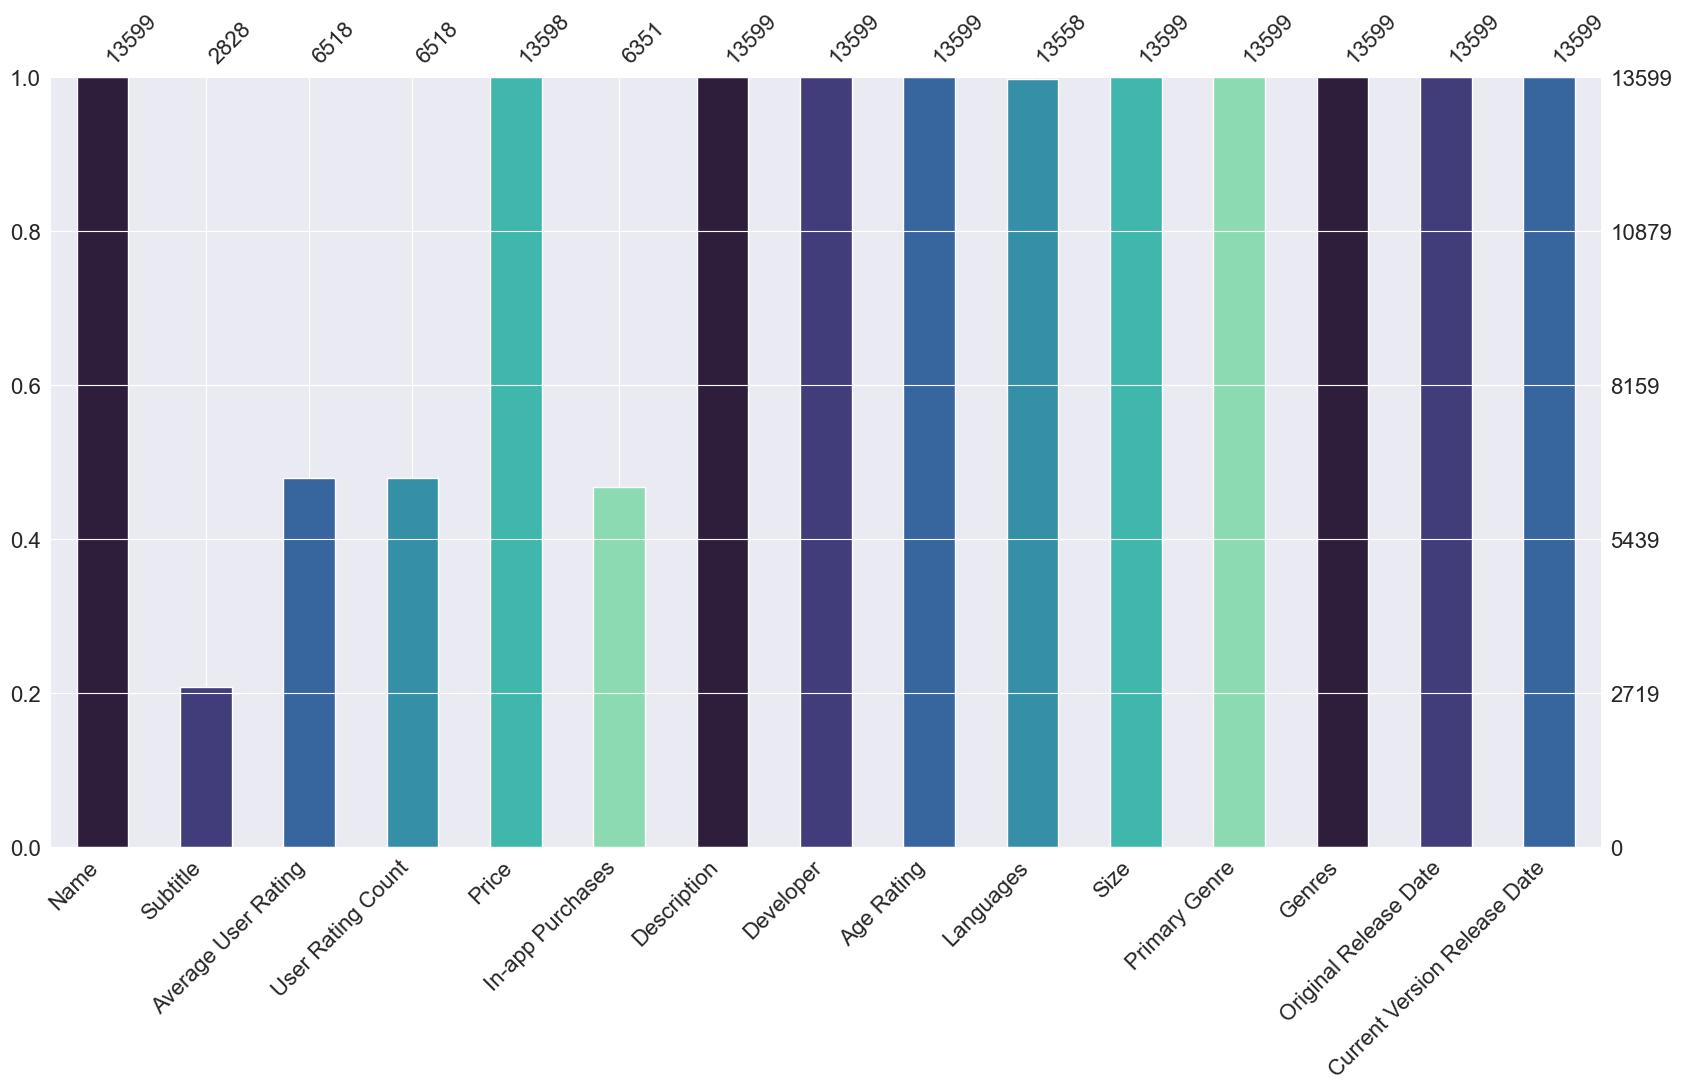

In [171]:
msno.bar(df,color=mako_palette, figsize=(20, 10))
plt.show()

- Here subtitle has almost 80% missing values. So we are gonna drop it.

In [172]:
df.drop(['Subtitle'], axis=1, inplace=True)

- In Price and language column we have < 1% missing values. So we are gonna drop the rows with missing values.

In [173]:
df.dropna(subset=['Price','Languages'], inplace=True)

In [174]:
missing_df = get_missing_precentage(df)
missing_df

,index,Missing Values,Precentage
4,In-app Purchases,7223,53.28
1,Average User Rating,7055,52.04
2,User Rating Count,7055,52.04
0,Name,0,0.00
3,Price,0,0.00
5,Description,0,0.00
6,Developer,0,0.00
7,Age Rating,0,0.00
8,Languages,0,0.00
9,Size,0,0.00


### Analysing Missing Values

In [175]:
df[df['In-app Purchases'].isna()].sample(10)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
10213,Classic Bomber Legend,4.0,33.0,0.00,NaN,The general goal throughout the series is to c...,Cuong Pham,4+,EN,9805824,Games,"Games, Puzzle, Strategy, Entertainment",12/11/2016,9/12/2016
7211,Der Raub Fischer LT,NaN,NaN,0.00,NaN,Im Raub Fischer Spiel musst Du die Fische fang...,WebLantis,4+,EN,40630272,Games,"Games, Entertainment, Action, Strategy",8/11/2015,3/6/2019
342,My Kingdom for the Princess HD,4.5,676.0,4.99,NaN,It offers plenty of hours of entertainment in ...,Nevosoft LLC,4+,"NL, EN, FR, DE, IT, JA, KO, PT, RU, ES, SV",121187328,Games,"Games, Simulation, Strategy",18/06/2010,10/8/2017
1802,ChessVisionDrills,4.5,14.0,1.99,NaN,"""This game challenges you to find forks and sk...",Michael anderson,4+,EN,6778880,Games,"Games, Strategy, Board",10/12/2012,26/08/2014
1800,Abalone\xae,4.5,85.0,3.99,NaN,Discover our new version with brand new graphi...,Asmodee Digital,4+,"NL, EN, FR, DE, IT, PT, ES",51515392,Games,"Games, Entertainment, Board, Strategy",21/03/2013,30/01/2018
5882,Battlegrounds Real Time Strategy Multiplayer: ...,3.0,9.0,0.00,NaN,"""Battlegrounds: Spy vs Spy Edition is a fast p...","Sirqul, Inc.",12+,EN,127184896,Games,"Games, Action, Strategy, Entertainment",30/06/2015,10/8/2015
5914,SPACE SNAKES,NaN,NaN,0.00,NaN,FREE NEW RELEASE!!\n\n LIMITED TIM...,Daniel Youssef,4+,EN,131751936,Games,"Games, Casual, Strategy, Entertainment",20/05/2015,21/06/2015
8546,Revolution of everyone,NaN,NaN,1.99,NaN,"""Gather your efforts to start a revolution!\n\...",Dong hung Park,9+,"EN, JA, KO",71329792,Games,"Games, Strategy, Role Playing",25/06/2016,11/10/2018
13408,Call Baby,3.5,22.0,0.00,NaN,Funny Calls from Baby by click on the fake cal...,Tien Tran Thanh,4+,EN,27499520,Games,"Games, Lifestyle, Family, Strategy",1/1/2018,3/3/2018
6061,Pocket God vs Desert Ashes,4.5,18.0,4.99,NaN,"It\'s ""Clash of the Titans!"" Or, rather, ""Clas...",Bolt Creative,4+,EN,227806208,Games,"Games, Adventure, Strategy, Entertainment",20/08/2015,21/11/2015


In [176]:
df['Average User Rating'].unique()

array([4. , 3.5, 3. , 2.5, nan, 2. , 4.5, 1.5, 5. , 1. ])

- Here we are going to impute the missing values in `Avarage User Rating` , `User Rating Count` and `In-app Purchases` columns with 0.

In [177]:
df.fillna(0,inplace=True)

In [178]:
missing_df = get_missing_precentage(df)
missing_df

,index,Missing Values,Precentage
0,Name,0,0.0
1,Average User Rating,0,0.0
2,User Rating Count,0,0.0
3,Price,0,0.0
4,In-app Purchases,0,0.0
5,Description,0,0.0
6,Developer,0,0.0
7,Age Rating,0,0.0
8,Languages,0,0.0
9,Size,0,0.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13557 entries, 0 to 13598
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          13557 non-null  object 
 1   Average User Rating           13557 non-null  float64
 2   User Rating Count             13557 non-null  float64
 3   Price                         13557 non-null  float64
 4   In-app Purchases              13557 non-null  object 
 5   Description                   13557 non-null  object 
 6   Developer                     13557 non-null  object 
 7   Age Rating                    13557 non-null  object 
 8   Languages                     13557 non-null  object 
 9   Size                          13557 non-null  int64  
 10  Primary Genre                 13557 non-null  object 
 11  Genres                        13557 non-null  object 
 12  Original Release Date         13557 non-null  object 
 13  Curren

In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,13557.0,1.933909e+00,2.080427e+00,0.0,0.0,0.0,4.0,5.000000e+00
User Rating Count,13557.0,1.721030e+03,3.155357e+04,0.0,0.0,0.0,43.0,3.032734e+06
Price,13557.0,9.259600e-01,8.710797e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,13557.0,1.041162e+08,1.975854e+08,51328.0,21199872.0,48438272.0,112969728.0,4.005591e+09


In [181]:
df.describe(include='object').T

,count,unique,top,freq
Name,13557,13427,Match The Tiles Mahjong Puzzle,2
In-app Purchases,13557,3100,0,7223
Description,13557,13073,#NAME?,13
Developer,13557,6646,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,122
Age Rating,13557,4,4+,9557
Languages,13557,844,EN,9737
Primary Genre,13557,20,Games,13019
Genres,13557,884,"Games, Strategy, Puzzle",620
Original Release Date,13557,2792,2/9/2016,74
Current Version Release Date,13557,2472,31/07/2019,43


### Converting the dates to datetime format

In [182]:
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'],format='%d/%m/%Y')
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'],format='%d/%m/%Y')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13557 entries, 0 to 13598
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          13557 non-null  object        
 1   Average User Rating           13557 non-null  float64       
 2   User Rating Count             13557 non-null  float64       
 3   Price                         13557 non-null  float64       
 4   In-app Purchases              13557 non-null  object        
 5   Description                   13557 non-null  object        
 6   Developer                     13557 non-null  object        
 7   Age Rating                    13557 non-null  object        
 8   Languages                     13557 non-null  object        
 9   Size                          13557 non-null  int64         
 10  Primary Genre                 13557 non-null  object        
 11  Genres                        135

In [184]:
df['User Rating Count'] = df['User Rating Count'].astype(object)

## EDA

### Univariate Analysis - Numerical Variables

In [185]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Average User Rating', 'Price', 'Size'], dtype='object')

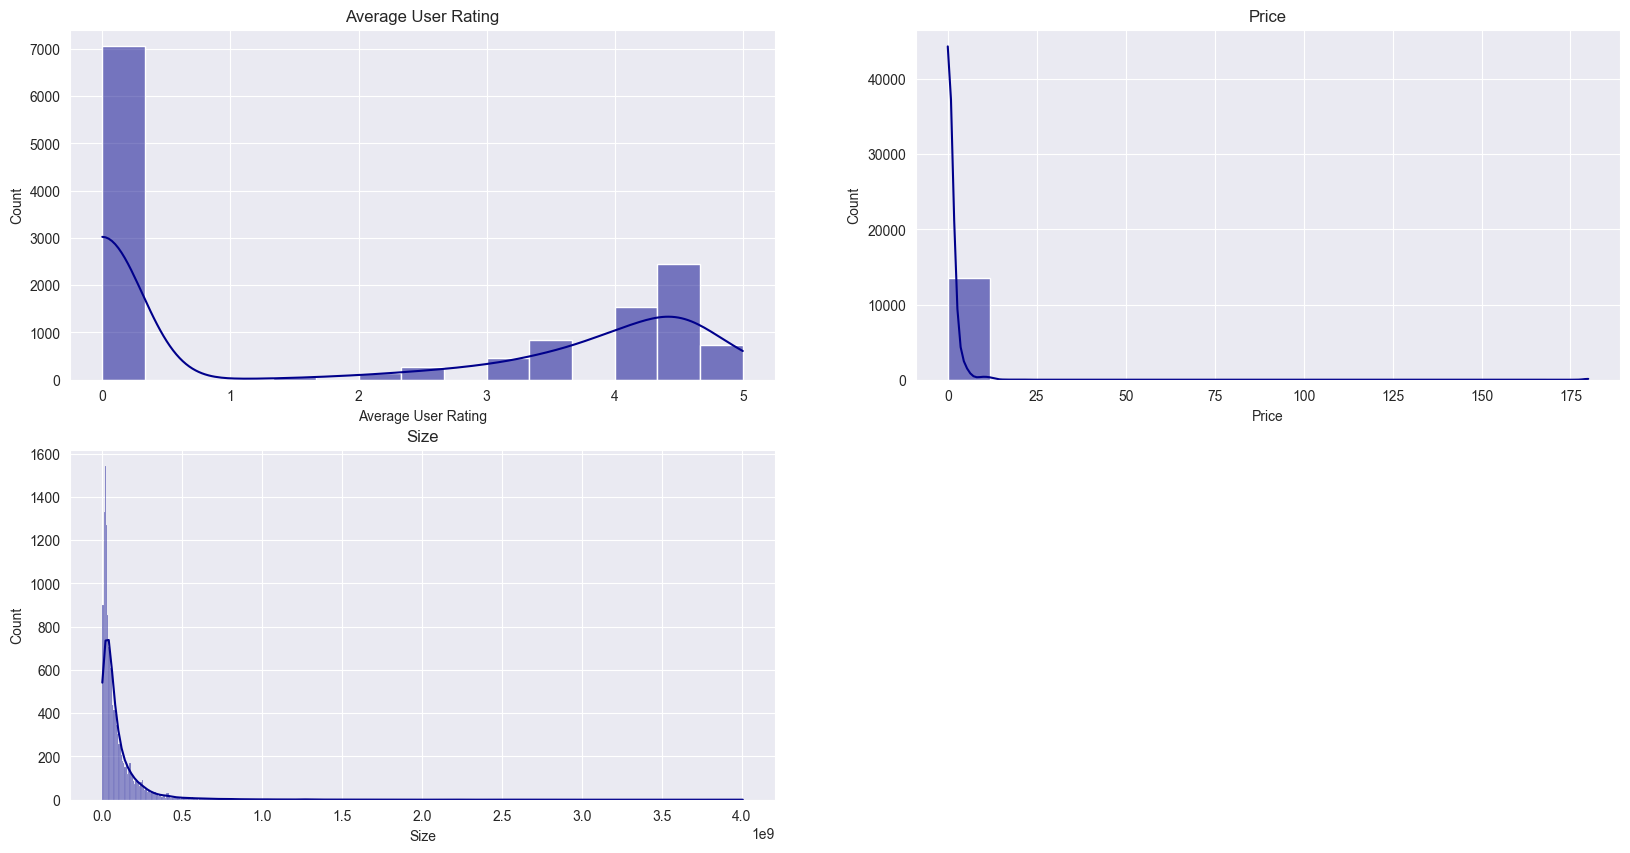

In [186]:
plt.figure(figsize=(20, 10))
for idx, col in enumerate(numerical_columns):
    plt.subplot(2, 2, idx + 1)
    g = sns.histplot(data=df, x=col, color='darkblue', kde=True)
    g.set_title(col)
plt.show()

## Univariate Analysis - Categorical Variables

In [187]:
categorical_columns = ['User Rating Count','In-app Purchases','Developer','Age Rating','Languages','Primary Genre','Genres']
categorical_columns

['User Rating Count',
 'In-app Purchases',
 'Developer',
 'Age Rating',
 'Languages',
 'Primary Genre',
 'Genres']

In [188]:
for col in categorical_columns:
    print(f"The unique values in {col} are: {df[col].value_counts()}")
    print("-" * 100)

The unique values in User Rating Count are: User Rating Count
0.0        7055
5.0         325
6.0         267
7.0         212
8.0         207
           ... 
1344.0        1
691.0         1
782.0         1
1927.0        1
25678.0       1
Name: count, Length: 1640, dtype: int64
----------------------------------------------------------------------------------------------------
The unique values in In-app Purchases are: In-app Purchases
0                                                              7223
0.99                                                            811
2.99                                                            542
1.99                                                            451
4.99                                                            127
                                                               ... 
1.99, 1.99, 4.99, 1.99, 1.99, 5.99, 1.99, 9.99, 0.99, 5.99        1
2.99, 2.99, 1.99, 9.99, 9.99, 4.99, 0.99, 0.99, 1.99, 0.99        1
0.99, 2.99, 4.99,

In [189]:
def explode_columns(df:pd.DataFrame, columns, float_columns=None):
    """
    Explodes multiple comma-separated string columns into separate rows.
    
    Parameters:
    df : pandas DataFrame
    columns : list of column names to explode
    """
    
    df = df.copy()
    
    if float_columns is None:
        float_columns = []
    
    for col in columns:
        # Split by comma
        df[col] = df[col].str.split(",")
        
        # Remove spaces
        df[col] = df[col].apply(
            lambda x: [item.strip() for item in x] if isinstance(x, list) else x
        )
        
        # Explode
        df = df.explode(col)
        
        # Convert to float if needed
        if col in float_columns:
            df[col] = df[col].astype(float)
    
    return df.reset_index()

In [190]:
columns_to_explode = ["In-app Purchases", "Languages",'Genres']
float_cols =['In-app Purchases']

df = explode_columns(df, columns_to_explode, float_cols)
df.head()

,index,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Games,2008-07-11,2017-05-30
1,0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Strategy,2008-07-11,2017-05-30
2,0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Puzzle,2008-07-11,2017-05-30
3,0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Games,2008-07-11,2017-05-30
4,0,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Strategy,2008-07-11,2017-05-30


In [191]:
df.fillna(0, inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577445 entries, 0 to 577444
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         577445 non-null  int64         
 1   Name                          577445 non-null  object        
 2   Average User Rating           577445 non-null  float64       
 3   User Rating Count             577445 non-null  object        
 4   Price                         577445 non-null  float64       
 5   In-app Purchases              577445 non-null  float64       
 6   Description                   577445 non-null  object        
 7   Developer                     577445 non-null  object        
 8   Age Rating                    577445 non-null  object        
 9   Languages                     577445 non-null  object        
 10  Size                          577445 non-null  int64         
 11  Primary Genre

In [193]:
for col in categorical_columns:
    print(f"The unique values in {col} are: {df[col].value_counts()}")
    print("-" * 100)

The unique values in User Rating Count are: User Rating Count
0.0       126991
5.0         8084
6.0         5510
14.0        5425
13.0        5386
           ...  
512.0          3
1292.0         3
6905.0         3
1417.0         3
7499.0         2
Name: count, Length: 1640, dtype: int64
----------------------------------------------------------------------------------------------------
The unique values in In-app Purchases are: In-app Purchases
0.99      98015
0.00      78657
4.99      71282
1.99      66873
9.99      55477
          ...  
169.99        4
17.49         4
41.99         3
42.99         3
299.99        2
Name: count, Length: 79, dtype: int64
----------------------------------------------------------------------------------------------------
The unique values in Developer are: Developer
8Floor                                        8774
HU YANRUI                                     7390
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    6141
Gameloft                            

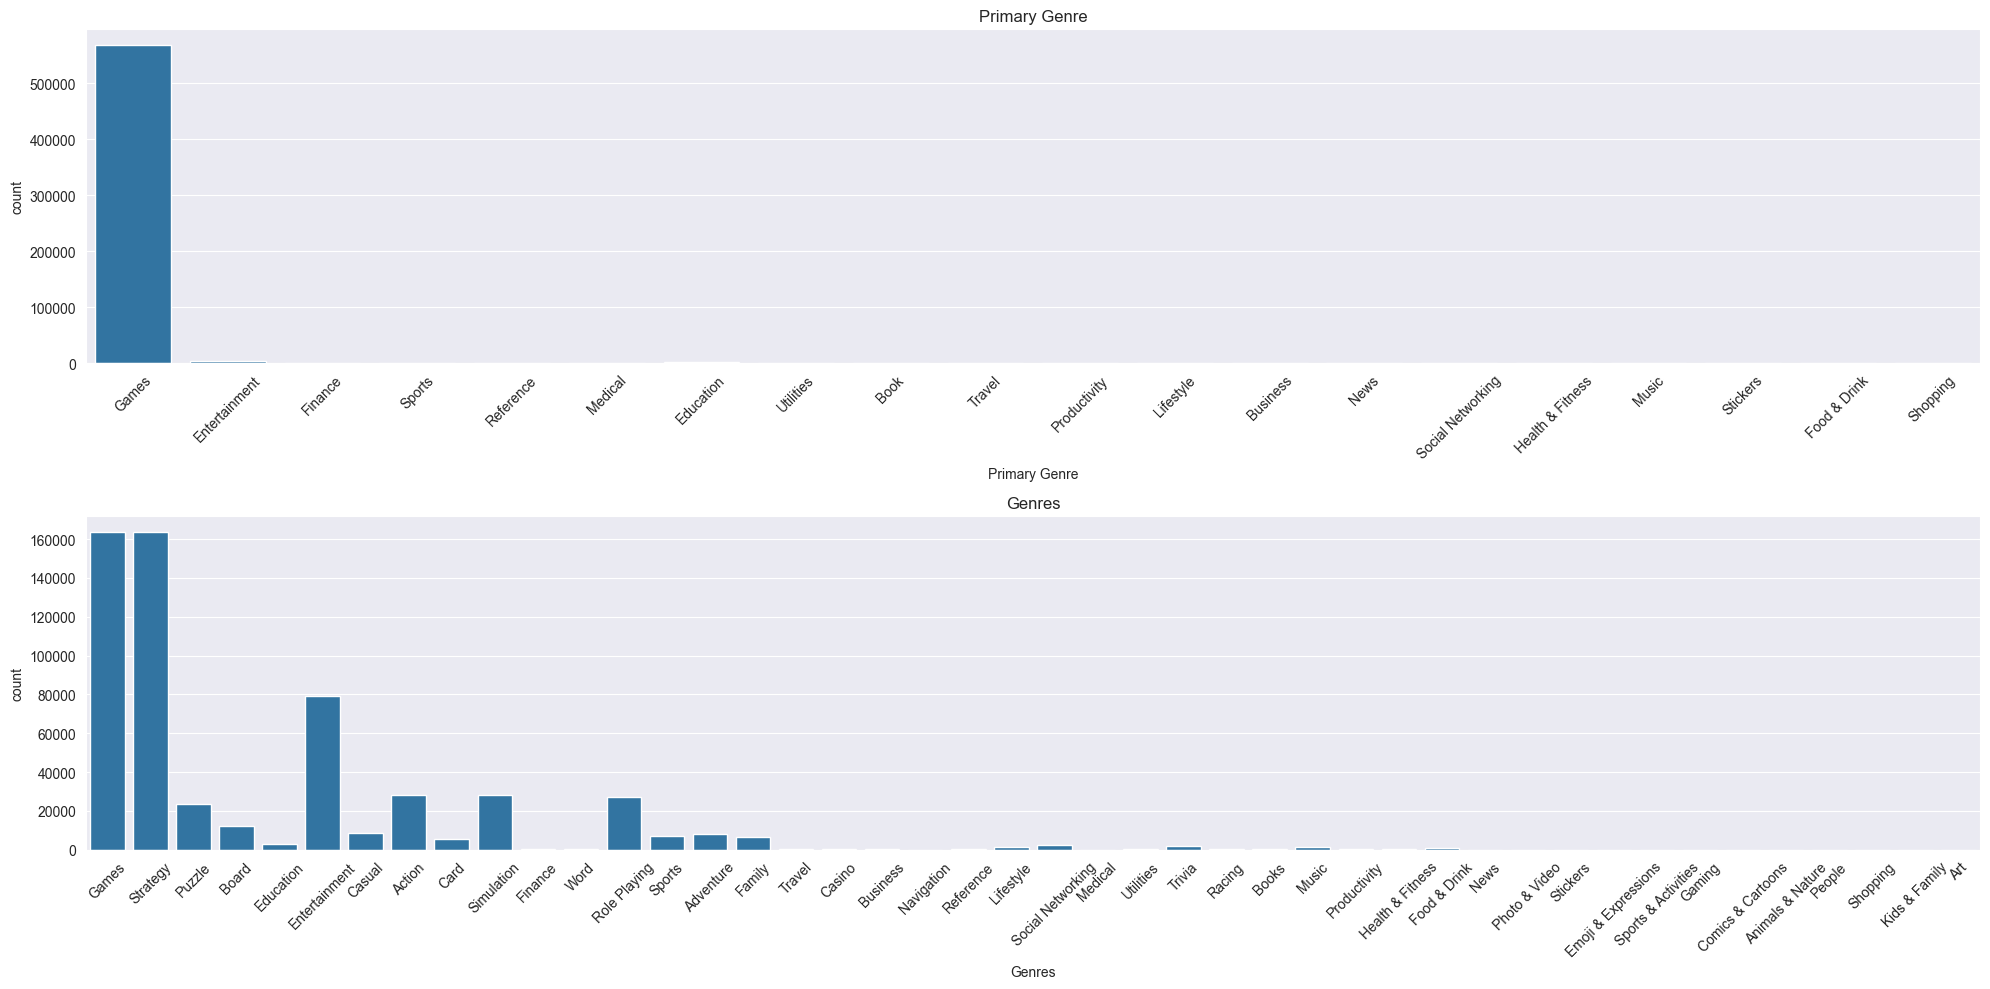

In [194]:
plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
g= sns.countplot(data=df, x='Primary Genre')
g.set_title('Primary Genre')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
g= sns.countplot(data=df, x='Genres')
g.set_title('Genres')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577445 entries, 0 to 577444
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         577445 non-null  int64         
 1   Name                          577445 non-null  object        
 2   Average User Rating           577445 non-null  float64       
 3   User Rating Count             577445 non-null  object        
 4   Price                         577445 non-null  float64       
 5   In-app Purchases              577445 non-null  float64       
 6   Description                   577445 non-null  object        
 7   Developer                     577445 non-null  object        
 8   Age Rating                    577445 non-null  object        
 9   Languages                     577445 non-null  object        
 10  Size                          577445 non-null  int64         
 11  Primary Genre

## Dealing with date

In [196]:
df['Original Year'] = df['Original Release Date'].dt.year
df['Current Version Release Year'] = df['Current Version Release Date'].dt.year

df.drop(['Original Release Date', 'Current Version Release Date'], axis=1, inplace=True)
df.head()

,index,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Year,Current Version Release Year
0,0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Games,2008,2017
1,0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Strategy,2008,2017
2,0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Puzzle,2008,2017
3,0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Games,2008,2017
4,0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Strategy,2008,2017


In [197]:
df.drop(['index'], axis=1, inplace=True)
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Year,Current Version Release Year
0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Games,2008,2017
1,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Strategy,2008,2017
2,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,DA,15853568,Games,Puzzle,2008,2017
3,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Games,2008,2017
4,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,NL,15853568,Games,Strategy,2008,2017


In [198]:
df.shape

(577445, 14)

## Encoding

In [199]:
categories = [['4+', '9+', '12+', '17+']]
oe = OrdinalEncoder(categories=categories)
df['Age Rating'] = oe.fit_transform(df[['Age Rating']])

In [200]:
df['Age Rating'].value_counts()

Age Rating
0.0    273473
1.0    152669
2.0    134762
3.0     16541
Name: count, dtype: int64

In [204]:
df = pd.get_dummies(df, columns=['Primary Genre','Genres','Languages'] ,drop_first=True,dtype=int,prefix=['Primary Genre','Gerne','Languages'])

In [205]:
df.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Size,Original Year,...,Languages_TR,Languages_TT,Languages_UG,Languages_UK,Languages_UR,Languages_UZ,Languages_VI,Languages_YI,Languages_ZH,Languages_ZU
0,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,0.0,15853568,2008,...,0,0,0,0,0,0,0,0,0,0
1,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,0.0,15853568,2008,...,0,0,0,0,0,0,0,0,0,0
2,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,0.0,15853568,2008,...,0,0,0,0,0,0,0,0,0,0
3,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,0.0,15853568,2008,...,0,0,0,0,0,0,0,0,0,0
4,Sudoku,4.0,3553.0,2.99,0.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,0.0,15853568,2008,...,0,0,0,0,0,0,0,0,0,0


# Splitting the data

In [49]:
X = df.drop(['Name','Description','Developer','Average User Rating'], axis=1)
y= df['Average User Rating']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2026)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((461956, 181), (115489, 181), (461956,), (115489,))

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The Model

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [132]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred = lr.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [135]:
print(f"Mean Squared Error: {mse}\n")
print(f"R-squared: {r2}")

Mean Squared Error: 2.5578868256194154

R-squared: 0.22302392248855252


In [136]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.5993394966733658


In [138]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.001242403389067357
R-squared: 0.9996226112499365
Root Mean Squared Error: 0.03524774303508463


# Saving the model

In [1]:
import pickle

In [142]:
pickle.dump(rf, open('random_forest.pkl', 'wb'))

# Load the model

In [136]:
model = pickle.load(open('random_forest.pkl', 'rb'))

In [137]:
submission_df = pd.read_csv('samples_mobile_game_success_test_set.csv')
submission_df.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,"0.99, 0.99, 4.99, 4.99, 4.99, 9.99, 24.99, 0.9...",-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",459571200,Games,"Games, Strategy, Entertainment, Role Playing",19/02/2018,NaN
1,https://apps.apple.com/us/app/idle-ship-heroes...,1342462183,Idle Ship Heroes-clicker game,Idle Pixel Game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,210,0,"3.99, 0.99, 2.99","""Idle Ship Heroes-clicker game is an epoch-mak...",degui lin,4+,NaN,138902528,Games,"Games, Strategy, Role Playing",12/2/2018,13/07/2019
2,https://apps.apple.com/us/app/roads-of-rome-2/...,1342739771,NaN,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,15,0,5.99,"""Take up new tricky tasks and overcome dangero...",Qumaron,4+,"EN, FR, DE, IT, RU, ES",289604608,Games,"Games, Simulation, Entertainment, Strategy",25/07/2018,22/10/2018
3,https://apps.apple.com/us/app/onmyoji-arena/id...,1343073274,Onmyoji Arena,Summer Carnival,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,10362,0,"9.99, 0.99, 4.99, 19.99, 49.99, 99.99","""Onmyoji Arena's Summer Carnival is now open. ...",NetEase Games,12+,"EN, JA, KO, ZH, ZH",2212520960,Games,NaN,3/8/2018,23/07/2019
4,https://apps.apple.com/us/app/3q-vl-tam-qu%E1%...,1343078721,3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5,0,"0.99, 6.99, 3.99, 12.99, 25.99, 64.99",3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,Tu Tran,12+,ZH,609270784,Games,"Games, Strategy, Role Playing",22/04/2018,30/05/2018


In [138]:
submission_df.loc[0,'Current Version Release Date'] = '19/02/2018'
submission_df.loc[3,'Genres'] = 'Games'
submission_df.loc[1,'Languages'] = 'English'
submission_df.loc[5,'Primary Genre'] = 'Games'
submission_df.loc[5,'Age Rating'] = '4+'

In [139]:
submission_df.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,"0.99, 0.99, 4.99, 4.99, 4.99, 9.99, 24.99, 0.9...",-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",459571200,Games,"Games, Strategy, Entertainment, Role Playing",19/02/2018,19/02/2018
1,https://apps.apple.com/us/app/idle-ship-heroes...,1342462183,Idle Ship Heroes-clicker game,Idle Pixel Game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,210,0,"3.99, 0.99, 2.99","""Idle Ship Heroes-clicker game is an epoch-mak...",degui lin,4+,English,138902528,Games,"Games, Strategy, Role Playing",12/2/2018,13/07/2019
2,https://apps.apple.com/us/app/roads-of-rome-2/...,1342739771,NaN,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,15,0,5.99,"""Take up new tricky tasks and overcome dangero...",Qumaron,4+,"EN, FR, DE, IT, RU, ES",289604608,Games,"Games, Simulation, Entertainment, Strategy",25/07/2018,22/10/2018
3,https://apps.apple.com/us/app/onmyoji-arena/id...,1343073274,Onmyoji Arena,Summer Carnival,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,10362,0,"9.99, 0.99, 4.99, 19.99, 49.99, 99.99","""Onmyoji Arena's Summer Carnival is now open. ...",NetEase Games,12+,"EN, JA, KO, ZH, ZH",2212520960,Games,Games,3/8/2018,23/07/2019
4,https://apps.apple.com/us/app/3q-vl-tam-qu%E1%...,1343078721,3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5,0,"0.99, 6.99, 3.99, 12.99, 25.99, 64.99",3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,Tu Tran,12+,ZH,609270784,Games,"Games, Strategy, Role Playing",22/04/2018,30/05/2018


In [140]:
submission_df

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,"0.99, 0.99, 4.99, 4.99, 4.99, 9.99, 24.99, 0.9...",-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",459571200,Games,"Games, Strategy, Entertainment, Role Playing",19/02/2018,19/02/2018
1,https://apps.apple.com/us/app/idle-ship-heroes...,1342462183,Idle Ship Heroes-clicker game,Idle Pixel Game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,210,0,"3.99, 0.99, 2.99","""Idle Ship Heroes-clicker game is an epoch-mak...",degui lin,4+,English,138902528,Games,"Games, Strategy, Role Playing",12/2/2018,13/07/2019
2,https://apps.apple.com/us/app/roads-of-rome-2/...,1342739771,NaN,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,15,0,5.99,"""Take up new tricky tasks and overcome dangero...",Qumaron,4+,"EN, FR, DE, IT, RU, ES",289604608,Games,"Games, Simulation, Entertainment, Strategy",25/07/2018,22/10/2018
3,https://apps.apple.com/us/app/onmyoji-arena/id...,1343073274,Onmyoji Arena,Summer Carnival,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,10362,0,"9.99, 0.99, 4.99, 19.99, 49.99, 99.99","""Onmyoji Arena's Summer Carnival is now open. ...",NetEase Games,12+,"EN, JA, KO, ZH, ZH",2212520960,Games,Games,3/8/2018,23/07/2019
4,https://apps.apple.com/us/app/3q-vl-tam-qu%E1%...,1343078721,3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5,0,"0.99, 6.99, 3.99, 12.99, 25.99, 64.99",3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,Tu Tran,12+,ZH,609270784,Games,"Games, Strategy, Role Playing",22/04/2018,30/05/2018
5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,"4.99, 0.99, 4.99, 19.99, 4.99, 0.99, 9.99, 0.9...",Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,"Games, Role Playing, Strategy",26/04/2018,8/3/2019


In [145]:
submission_df.loc[1,'Languages'] = "EN"

In [146]:
submission_df

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,"0.99, 0.99, 4.99, 4.99, 4.99, 9.99, 24.99, 0.9...",-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,"AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...",459571200,Games,"Games, Strategy, Entertainment, Role Playing",19/02/2018,19/02/2018
1,https://apps.apple.com/us/app/idle-ship-heroes...,1342462183,Idle Ship Heroes-clicker game,Idle Pixel Game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,210,0,"3.99, 0.99, 2.99","""Idle Ship Heroes-clicker game is an epoch-mak...",degui lin,4+,EN,138902528,Games,"Games, Strategy, Role Playing",12/2/2018,13/07/2019
2,https://apps.apple.com/us/app/roads-of-rome-2/...,1342739771,NaN,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,15,0,5.99,"""Take up new tricky tasks and overcome dangero...",Qumaron,4+,"EN, FR, DE, IT, RU, ES",289604608,Games,"Games, Simulation, Entertainment, Strategy",25/07/2018,22/10/2018
3,https://apps.apple.com/us/app/onmyoji-arena/id...,1343073274,Onmyoji Arena,Summer Carnival,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,10362,0,"9.99, 0.99, 4.99, 19.99, 49.99, 99.99","""Onmyoji Arena's Summer Carnival is now open. ...",NetEase Games,12+,"EN, JA, KO, ZH, ZH",2212520960,Games,Games,3/8/2018,23/07/2019
4,https://apps.apple.com/us/app/3q-vl-tam-qu%E1%...,1343078721,3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5,0,"0.99, 6.99, 3.99, 12.99, 25.99, 64.99",3Q VL - Tam Qu\u1ed1c \u0110\u1ea9y T\u01b0\u1...,Tu Tran,12+,ZH,609270784,Games,"Games, Strategy, Role Playing",22/04/2018,30/05/2018
5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,"4.99, 0.99, 4.99, 19.99, 4.99, 0.99, 9.99, 0.9...",Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,"Games, Role Playing, Strategy",26/04/2018,8/3/2019


In [122]:
submission_df.isna().sum()

URL                             0
ID                              0
Name                            1
Subtitle                        2
Icon URL                        0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

In [147]:
submission_df = explode_columns(submission_df, ['In-app Purchases', 'Languages', 'Genres'], float_columns=['In-app Purchases'])
submission_df

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,AR,459571200,Games,Games,19/02/2018,19/02/2018
1,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,AR,459571200,Games,Strategy,19/02/2018,19/02/2018
2,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,AR,459571200,Games,Entertainment,19/02/2018,19/02/2018
3,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,AR,459571200,Games,Role Playing,19/02/2018,19/02/2018
4,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,12+,NL,459571200,Games,Games,19/02/2018,19/02/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,Role Playing,26/04/2018,8/3/2019
747,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,Strategy,26/04/2018,8/3/2019
748,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,Games,26/04/2018,8/3/2019
749,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,4+,EN,210612224,Games,Role Playing,26/04/2018,8/3/2019


In [148]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         751 non-null    int64  
 1   URL                           751 non-null    object 
 2   ID                            751 non-null    int64  
 3   Name                          727 non-null    object 
 4   Subtitle                      709 non-null    object 
 5   Icon URL                      751 non-null    object 
 6   User Rating Count             751 non-null    int64  
 7   Price                         751 non-null    int64  
 8   In-app Purchases              751 non-null    float64
 9   Description                   751 non-null    object 
 10  Developer                     751 non-null    object 
 11  Age Rating                    751 non-null    object 
 12  Languages                     751 non-null    object 
 13  Size 

In [149]:
submission_df['Age Rating'] = oe.transform(submission_df[['Age Rating']])

In [150]:
submission_df

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Games,19/02/2018,19/02/2018
1,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Strategy,19/02/2018,19/02/2018
2,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Entertainment,19/02/2018,19/02/2018
3,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Role Playing,19/02/2018,19/02/2018
4,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,NL,459571200,Games,Games,19/02/2018,19/02/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Role Playing,26/04/2018,8/3/2019
747,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Strategy,26/04/2018,8/3/2019
748,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Games,26/04/2018,8/3/2019
749,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Role Playing,26/04/2018,8/3/2019


In [151]:
submission_df['Current Version Release Date'] = pd.to_datetime(submission_df['Current Version Release Date'], format='%d/%m/%Y')
submission_df['Original Release Date'] = pd.to_datetime(submission_df['Original Release Date'], format='%d/%m/%Y')

In [152]:
submission_df['Original Year'] = submission_df['Original Release Date'].dt.year
submission_df['Current Version Release Year'] = submission_df['Current Version Release Date'].dt.year

In [153]:
submission_df.drop(['Current Version Release Date', 'Original Release Date'], axis=1, inplace=True)

In [154]:
submission_df

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Year,Current Version Release Year
0,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Games,2018,2018
1,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Strategy,2018,2018
2,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Entertainment,2018,2018
3,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,AR,459571200,Games,Role Playing,2018,2018
4,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,LONG TECH NETWORK LIMITED,2.0,NL,459571200,Games,Games,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Role Playing,2018,2019
747,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Strategy,2018,2019
748,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Games,2018,2019
749,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,KingsGroup Holdings,0.0,EN,210612224,Games,Role Playing,2018,2019


In [155]:
submission_df = pd.get_dummies(submission_df, columns=['Primary Genre','Genres','Languages'] ,drop_first=True,dtype=int,prefix=['Primary Genre','Gerne','Languages'])

In [156]:
submission_df

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,...,Languages_ID,Languages_IT,Languages_JA,Languages_KO,Languages_NL,Languages_PT,Languages_RU,Languages_TH,Languages_TR,Languages_ZH
0,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,...,0,0,0,0,0,0,0,0,0,0
1,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,...,0,0,0,0,0,0,0,0,0,0
2,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,...,0,0,0,0,0,0,0,0,0,0
3,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,...,0,0,0,0,0,0,0,0,0,0
4,0,https://apps.apple.com/us/app/last-shelter-sur...,1342290011,Last Shelter: Survival,"Build your city, Defend it",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,10281,0,0.99,-Real Time Nation vs. Nation post-apocalyptic ...,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
747,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,9.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
748,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
749,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X = submission_df.drop(['Name','Description','Developer','Subtitle',"ID","URL","Icon URL","index"], axis=1).values

In [208]:
X.shape

(751, 25)

In [209]:
X[0]

array([1.028100e+04, 0.000000e+00, 9.900000e-01, 2.000000e+00,
       4.595712e+08, 2.018000e+03, 2.018000e+03, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00])

In [216]:
target_len = 181

X_padded = np.array([
    np.pad(z, (0, target_len - len(z)), mode='constant')
    for z in X
])

In [217]:
X_sc = sc.transform(X_padded)

In [218]:
y_pred = model.predict(X_sc)

In [219]:
y_pred

array([4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 , 4.05 ,
       4.05 , 4.05 ,

In [229]:
submission_df[submission_df['ID']==1343106323]

,index,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,...,Languages_ID,Languages_IT,Languages_JA,Languages_KO,Languages_NL,Languages_PT,Languages_RU,Languages_TH,Languages_TR,Languages_ZH
721,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
722,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
723,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
724,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,0.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
725,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,0.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
726,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,0.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
727,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
728,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
729,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,4.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0
730,5,https://apps.apple.com/us/app/dino-war-rise-of...,1343106323,Dino War: Rise of Beasts,Next Gen MMO Strategy,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,532,0,19.99,Introducing a new era in MMO strategy gaming; ...,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y_pred[738]

4.44

In [232]:
data = {
    "ID": [1342290011,1342462183,1342739771,1343073274,1343078721,1343106323],
    "Average User Rating": [4.05,4.43,4.125,4.395,3.815,4.44]
}

submission_df = pd.DataFrame(data)
submission_df.to_csv('sample_submission.csv', index=False)

In [233]:
submission_df = pd.read_csv('sample_submission.csv')

In [234]:
submission_df

,ID,Average User Rating
0,1342290011,4.050
1,1342462183,4.430
2,1342739771,4.125
3,1343073274,4.395
4,1343078721,3.815
5,1343106323,4.440
